<a href="https://colab.research.google.com/github/Tanishka1208/Logistic-Regression/blob/main/Copy_of_Copy_of_Heart_disease_prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

Datasets

**1.Sex**: male or female(Nominal)

**2.Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

 **3.Current Smoker**: whether or not the patient is a current smoker (Nominal)

 **4.Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

 **5.BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

 **6.Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

**7.Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

**8.Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**


**9.Tot Chol**: total cholesterol level (Continuous)

 **10.Sys BP**: systolic blood pressure (Continuous)

 **11.Dia BP**: diastolic blood pressure (Continuous)

 **12.BMI**: Body Mass Index (Continuous)

**13.Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

 **14.Glucose**: glucose level (Continuous)
Predict variable (desired target)

 **15.10 year risk of coronary heart disease CHD** (binary: “1”, means “Yes”, “0” means “No”)


In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier

In [5]:
df = pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: title={'center': 'male'}, ylabel='Frequency'>

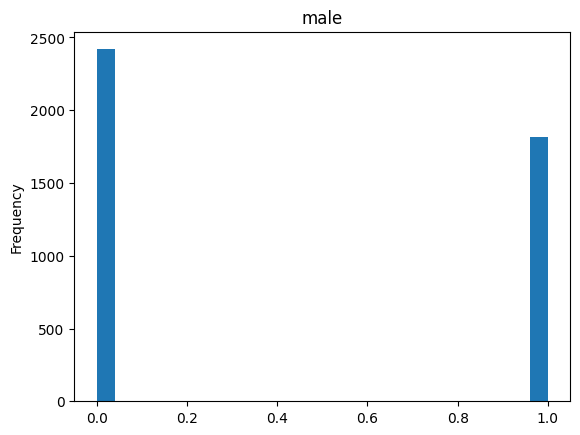

In [6]:
# @title male

from matplotlib import pyplot as plt
df['male'].plot(kind='hist', bins=25, title='male')

# **Eplore the data**

In [7]:
df.shape

(4238, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# # **Data Preprocessing**

**Rejecting irrelevant Feature**

In [10]:
df.drop(columns=['education'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


 **Calculate missing values**

In [12]:
df.isna().sum().sort_values(ascending = False)

glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [13]:
nan_rows = df[df['cigsPerDay'].isna()]
print(nan_rows)

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
131      1   43              1         NaN     0.0                0   
139      1   49              1         NaN     0.0                0   
1046     0   49              1         NaN     0.0                0   
1292     1   42              1         NaN     0.0                0   
1347     0   58              1         NaN     0.0                0   
1451     1   54              1         NaN     0.0                0   
1497     1   55              1         NaN     0.0                0   
1610     0   61              1         NaN     0.0                0   
1625     0   49              1         NaN     0.0                0   
1870     0   47              1         NaN     0.0                0   
1963     1   45              1         NaN     0.0                0   
1980     0   60              1         NaN     0.0                0   
2405     0   49              1         NaN     0.0                0   
2513  

In [14]:
#filled missing values in 'cigsPerDay' column with 0
df['cigsPerDay'].fillna(value=0.0,inplace=True)
df['heartRate'].fillna(value=0.0,inplace=True)
df['BMI'].fillna(value=0.0,inplace=True)
df['totChol'].fillna(value=0.0,inplace=True)
df['BPMeds'].fillna(value=0.0,inplace=True)
df['glucose'].fillna(value=0.0,inplace=True)

print(df['cigsPerDay'])

0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
4233     1.0
4234    43.0
4235    20.0
4236    15.0
4237     0.0
Name: cigsPerDay, Length: 4238, dtype: float64


# **Data distribution**

**Plot the distribution for all features.**

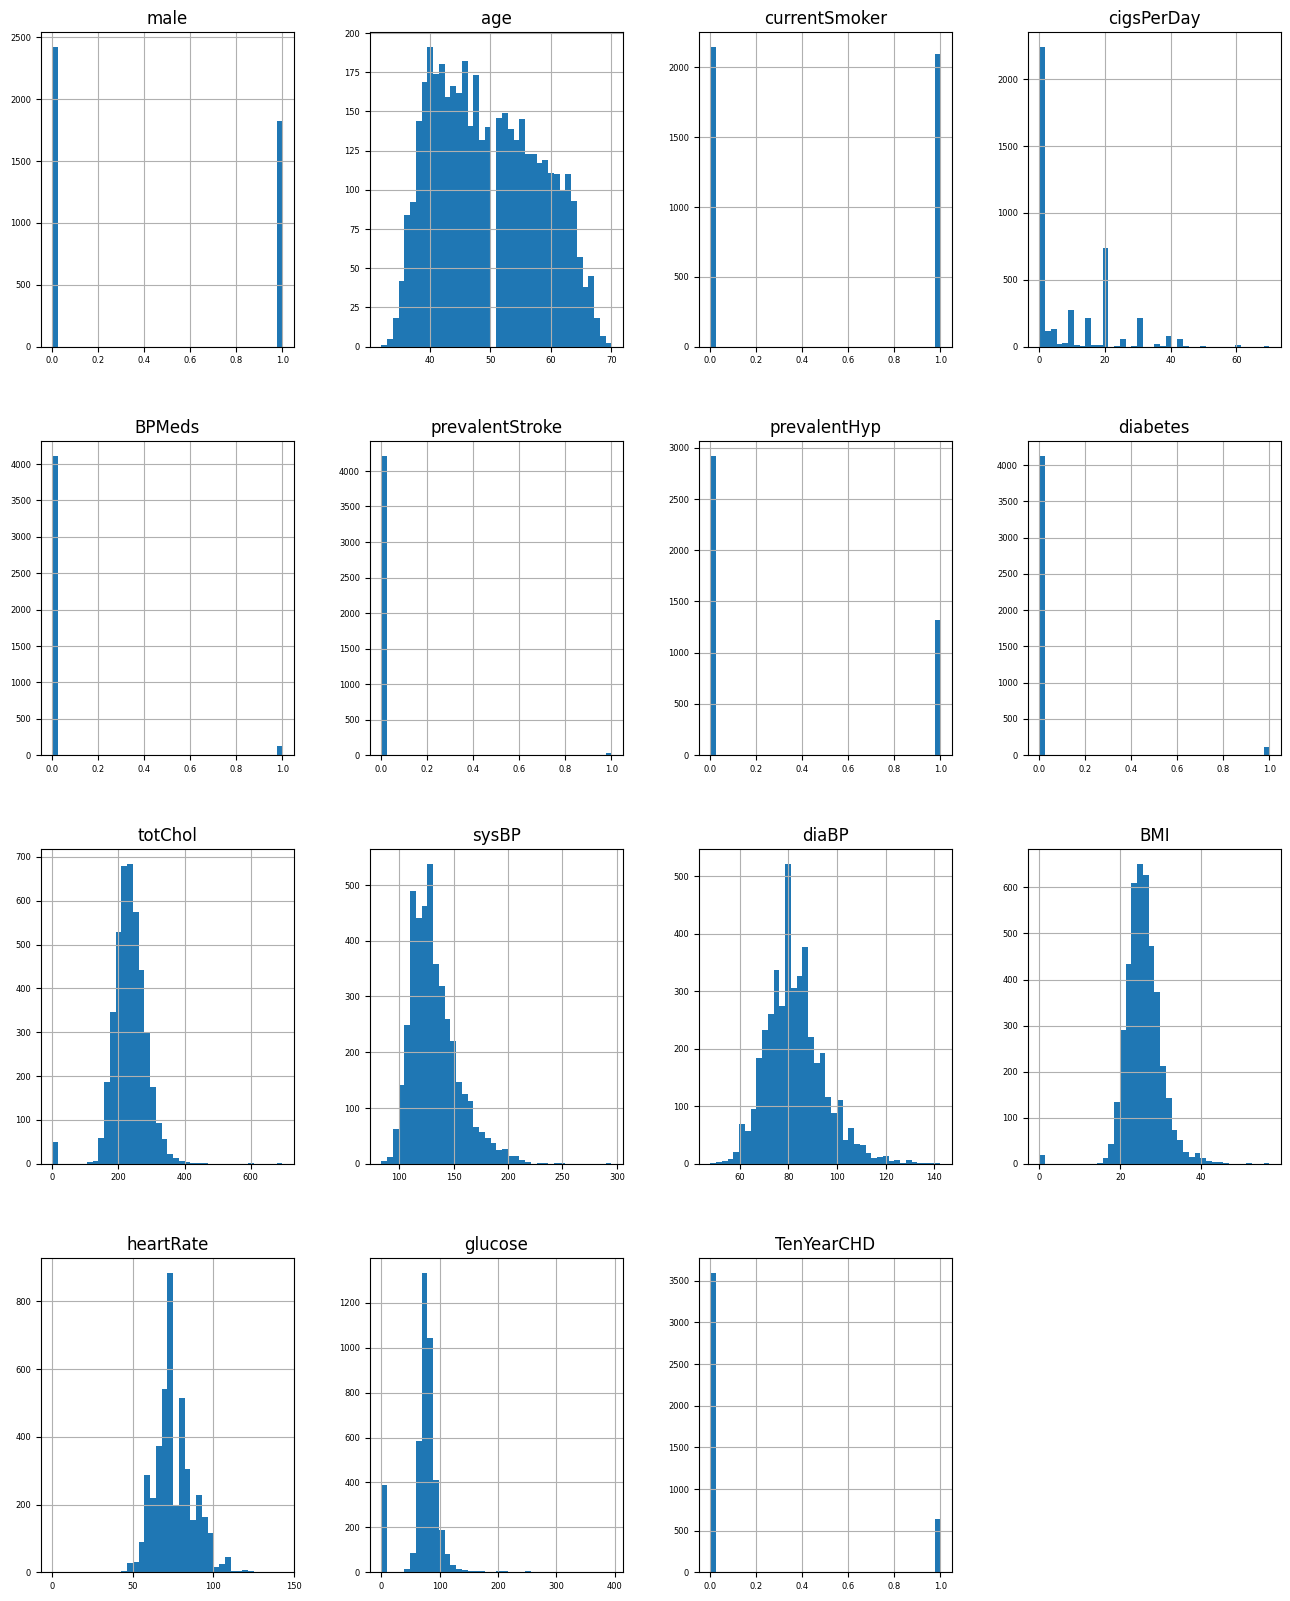

In [15]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

# **Outliers**

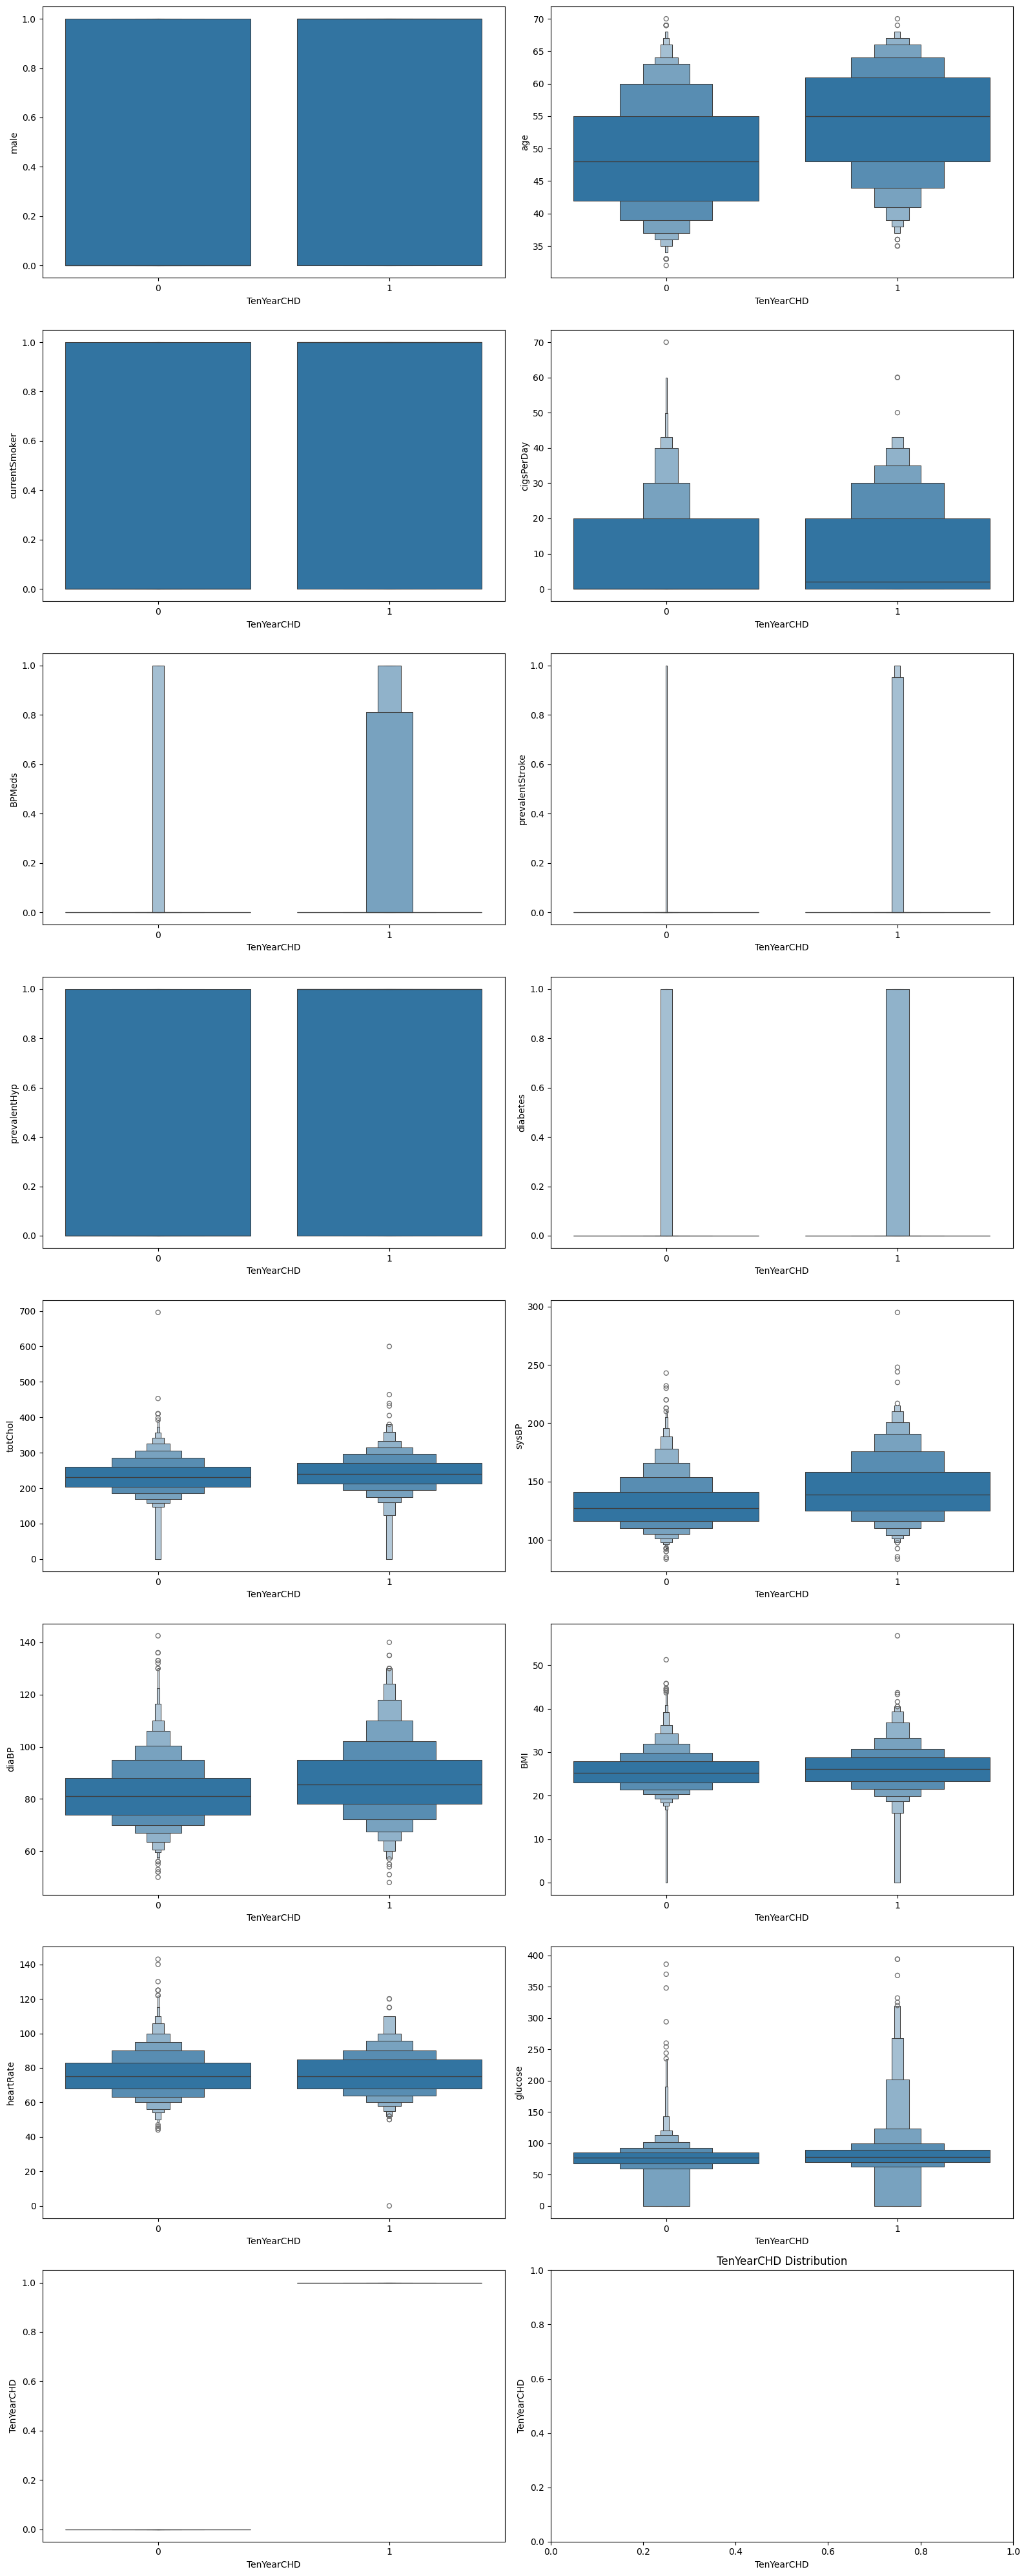

In [16]:
fig, axes = plt.subplots(nrows=(len(df.columns) + 1) // 2, ncols=2, figsize=(16, 40))
for idx,column in enumerate(df):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot( x='TenYearCHD' , y= column , data=df, ax=axes[row_idx, col_idx])
    plt.xlabel('TenYearCHD')
    plt.ylabel(column)
    plt.title(f"{column} Distribution")
    plt.tight_layout();

**There is not a lot of outliers**

# **Multicollinearity**

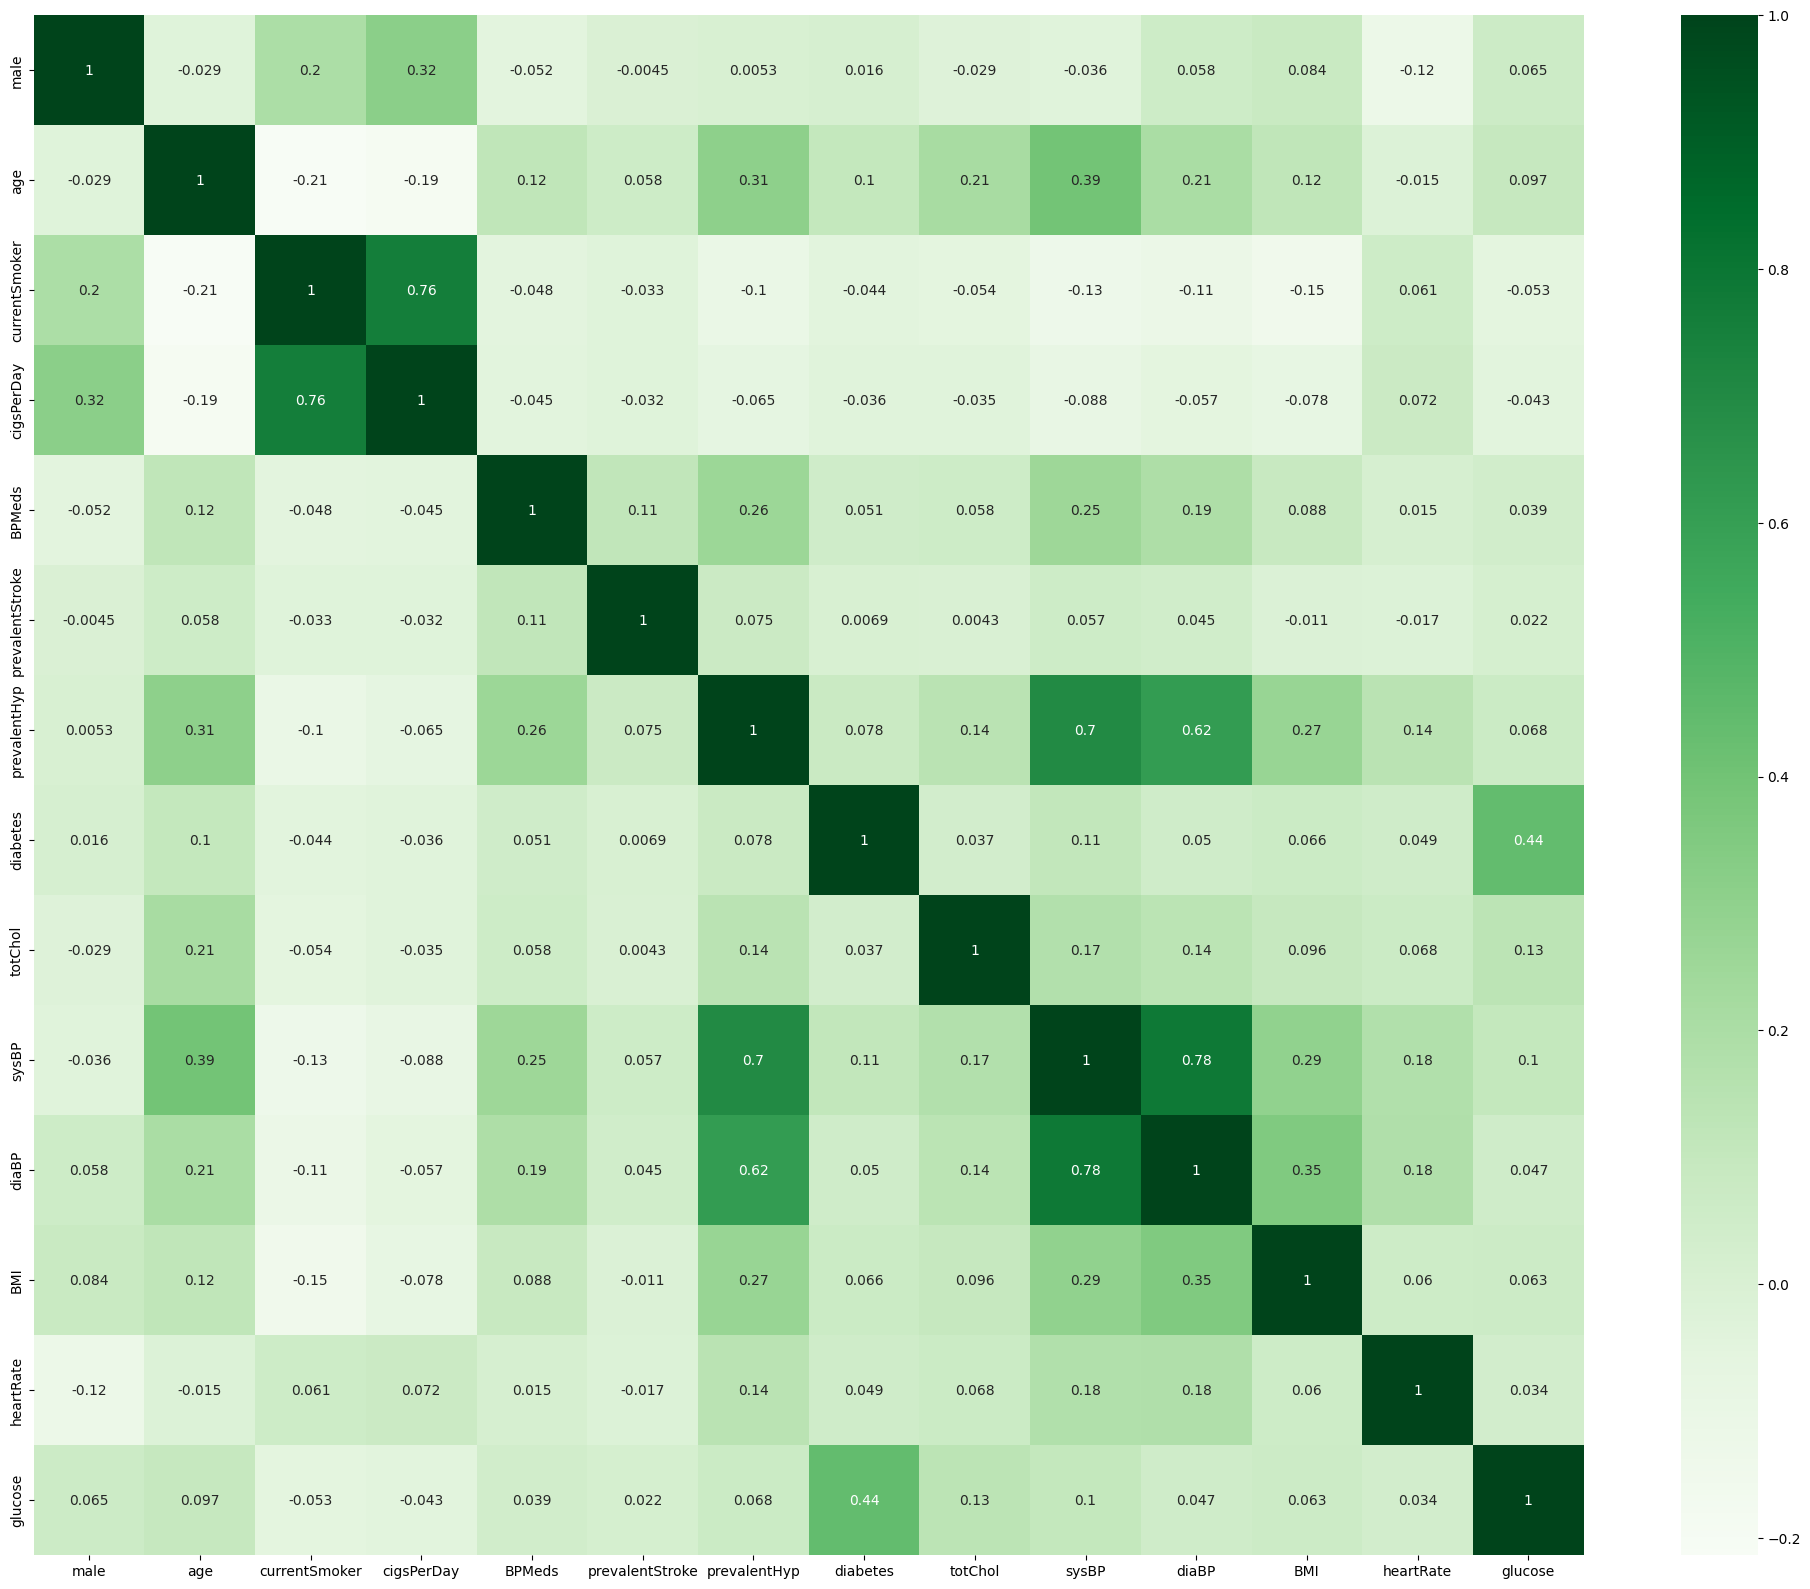

In [17]:
corr = df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

All the correlation coefficients are less than 0.8. The features cannot be neglected.

# **Splitting data for train and test**

In [18]:
X = df.drop(columns=['TenYearCHD'])
target = df['TenYearCHD']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3390, 14)
y_train shape: (3390,)
X_test shape: (848, 14)
y_test shape: (848,)


# **Baseline**

In [19]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8420


# **Logistic regression model**

In [25]:
LR_model = make_pipeline(
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [26]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8563
Testing accuracy :  0.8502


# **Confusion matrix**

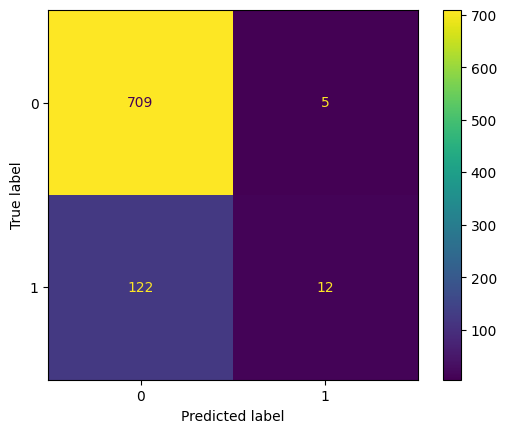

In [29]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test)

Precision=
True Positives/False Positives+
True Positives
​


In [30]:
print(classification_report(y_test , LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       714
           1       0.71      0.09      0.16       134

    accuracy                           0.85       848
   macro avg       0.78      0.54      0.54       848
weighted avg       0.83      0.85      0.80       848



Attained 85+% accuracy on testing the data using logical Regression.